In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from melp import Detector
import melp
import math

from melp.clustering.misc import*
import melp.clustering as clump
import melp.clustering.time_cluster as tclump
import melp.clustering.spatial_cluster as sclump
#from melp import TileAnalyzer

Welcome to JupyROOT 6.24/06


In [2]:
hittimes = hittimes_in_frame("./testdata/sorted/sorted1.root",1)
print(hittimes.values())
print(hittimes.keys())
print()
print(np.array(hittimes.values()))

dict_values([[82126], [82081], [82379], [82377], [82061], [82061], [82173], [82124], [82379], [82071], [82076], [82189], [82378], [82277], [82727], [82184], [82279], [82070], [82375], [82389], [82080], [82183], [82187], [82132], [82078], [82278], [82377], [82280], [82375], [82070], [82175], [82389], [82081], [82379], [82133], [82075], [82379], [82277]])
dict_keys([302134, 200650, 201084, 201247, 301983, 301926, 200738, 302133, 201202, 201332, 201331, 300489, 201029, 201091, 300092, 300545, 201147, 302640, 201312, 200084, 200706, 300490, 300433, 302611, 200816, 201036, 201085, 201148, 201313, 302583, 200794, 200028, 200705, 201259, 302610, 302704, 201028, 201203])

dict_values([[82126], [82081], [82379], [82377], [82061], [82061], [82173], [82124], [82379], [82071], [82076], [82189], [82378], [82277], [82727], [82184], [82279], [82070], [82375], [82389], [82080], [82183], [82187], [82132], [82078], [82278], [82377], [82280], [82375], [82070], [82175], [82389], [82081], [82379], [82133],

In [3]:
mu3e_detector = Detector.initFromROOT("./testdata/sorted/sorted1.root")
#mu3e_detector = Detector.initFromSave("test_detector_file")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  False
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


In [4]:
#mu3e_detector.save("test_detector_file")

In [5]:
melp.select(mu3e_detector)


In [6]:
print(mu3e_detector)

Detector(TileDetector=<melp.src.tile.TileDetector object at 0x7fab0a9a94c0>, SensorModules=<melp.src.sensor.SensorModule object at 0x7fab0a7d92b0>))


In [7]:
melp.addTileHits("./testdata/sorted/sorted1.root", truth=False, traj=False)

In [8]:
mu3e_detector.info()

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  False
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  [1]
  - Loaded Runs (Pixel):  []
------------------------------


In [9]:
masks = sclump.build_mask("./testdata/sorted/sorted1.root", 7)
#masks = sclump.build_mask_detector_class("./testdata/sorted/sorted1.root", 7, mu3e_detector)

keys = []
values = []
for key in masks.keys():
    keys.append(key)
    values.append(masks[key])
    
mu3e_detector.TileDetector.tile[keys[0]].id
mu3e_detector.TileDetector.tile[keys[0]].hits
print(values[0])

[202714, 202713, 202715, 202657, 202658, 202659, 202769, 202770, 202771]


<Figure size 432x288 with 0 Axes>

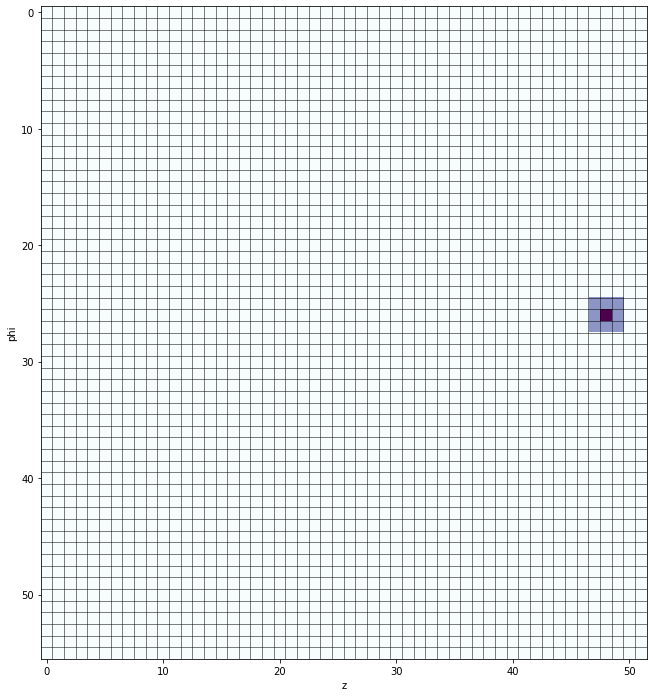

In [10]:
grid = np.zeros((52,56))

all_hits = False
#add hits in frame
if all_hits == True:
    for tile_id in mu3e_detector.TileDetector.tile:
        if tile_id < 300000:
            tile = mu3e_detector.TileDetector.tile[tile_id]
            for hits in tile.hits:
                if hits.frame_id in [7]:
                    id_sel = tile_id - 200000
                    x = math.floor(id_sel/56)
                    y = id_sel % 52
                    grid[x][y] += 1

#add mask
for mask_tile in values[0]:
    if mask_tile < 300000:
        id_sel_mask = mask_tile - 200000
        x = math.floor((id_sel_mask+1)/56)
        y = id_sel_mask % 56
        grid[x][y] += 1
        
#add centre a second time      
if keys[0] < 300000:
    id_sel_mask = keys[0] - 200000
    x = math.floor(id_sel_mask/56)
    y = id_sel_mask % 56
    grid[x][y] += 1
                     
                              
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(12,12))
#heatplot_mask = ax.imshow(mask_grid.T, cmap='binary')
heatplot = ax.imshow(grid.T, cmap='BuPu')
#ax.grid(which='minor', color='b', linestyle='-', linewidth=1)
plt.hlines(y=np.arange(0, 56)+0.5, xmin=-0.5, xmax=51.5, color="black", linewidth = 0.5)
plt.vlines(x=np.arange(0, 52)+0.5, ymin=-0.5, ymax=55.5, color="black", linewidth = 0.5)
plt.xlabel("z")
plt.ylabel("phi")
#plt.savefig("hitmap.png")
plt.show()

In [11]:
binned_data, xedges, yedges = np.histogram2d(hitangle[0], hitangle[1], bins=[220, 180])

NameError: name 'hitangle' is not defined

In [ ]:


fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned_data.T, cmap="turbo", norm = mpl.colors.LogNorm())
plt.ylabel("theta")
plt.xlabel("z")
plt.colorbar(im)
plt.show()